In [1]:
!pip install matplotlib

In [3]:
!pip install numpy

In [4]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.rc = {'font.size': 10, 'figure.figsize':(10.0, 6.0), 'figure.facecolor':(1,1,1,0), 'figure.subplot.bottom':0.125, 'figure.edgecolor':(1,1,1,0), 'figure.dpi': 72}
%matplotlib inline


Filtering Stopwords in a torkenized Sentence

- Stopwords are common words that generally do not contribute to the meaning of the sentence , at least for the purposes of information Retrieval(IR) and natural language processing
- These can be ignored in keyword-oriented IR without a significant effect on retrival accuracy
- NLTK comes with a stopwords corpus that contains word lists for many languages

In [5]:
from nltk.corpus import stopwords
english_stops = set(stopwords.words('english'))
words = ["Can't", 'is', 'a', 'contraction']
[word for word in words if word not in english_stops]

["Can't", 'contraction']

In [7]:
stopwords.fileids()

['arabic',
 'azerbaijani',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [8]:
stopwords.words('English')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Frequency Distributions

- Frequenct distribution - and it tell us the frequency of each vocabulary item in the text
- term frequency(tf)- frequency of a specific word occurs in a document

In [9]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [10]:
text = '''A central question in text mining and natural language processsing ia how to quantity what a document is about. Can we do this by looking at the words that make up the document? One measure of how important a word may be is its term frequency(tf), how frequently a word occurs in a document.'''

In [15]:
words = word_tokenize(text)
print(words)

['A', 'central', 'question', 'in', 'text', 'mining', 'and', 'natural', 'language', 'processsing', 'ia', 'how', 'to', 'quantity', 'what', 'a', 'document', 'is', 'about', '.', 'Can', 'we', 'do', 'this', 'by', 'looking', 'at', 'the', 'words', 'that', 'make', 'up', 'the', 'document', '?', 'One', 'measure', 'of', 'how', 'important', 'a', 'word', 'may', 'be', 'is', 'its', 'term', 'frequency', '(', 'tf', ')', ',', 'how', 'frequently', 'a', 'word', 'occurs', 'in', 'a', 'document', '.']


In [16]:
fdist = FreqDist(words)
fdist

FreqDist({'a': 4, 'how': 3, 'document': 3, 'in': 2, 'is': 2, '.': 2, 'the': 2, 'word': 2, 'A': 1, 'central': 1, ...})

In [13]:
fdist['What']

0

In [17]:
len(words)

61

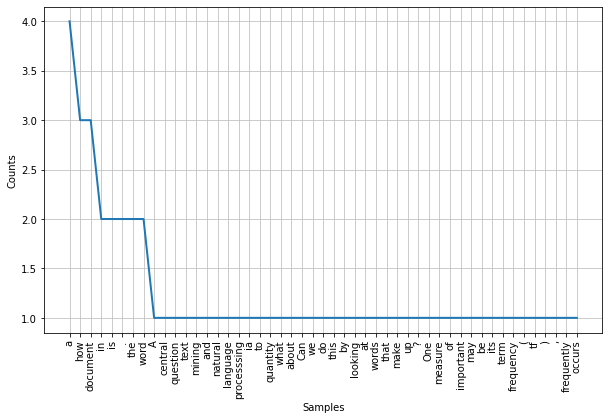

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [19]:
fdist.plot()

In [21]:
words = word_tokenize(text.lower())
print(words)

['a', 'central', 'question', 'in', 'text', 'mining', 'and', 'natural', 'language', 'processsing', 'ia', 'how', 'to', 'quantity', 'what', 'a', 'document', 'is', 'about', '.', 'can', 'we', 'do', 'this', 'by', 'looking', 'at', 'the', 'words', 'that', 'make', 'up', 'the', 'document', '?', 'one', 'measure', 'of', 'how', 'important', 'a', 'word', 'may', 'be', 'is', 'its', 'term', 'frequency', '(', 'tf', ')', ',', 'how', 'frequently', 'a', 'word', 'occurs', 'in', 'a', 'document', '.']


In [24]:
fdist = FreqDist(words)
fdist

FreqDist({'a': 5, 'how': 3, 'document': 3, 'in': 2, 'is': 2, '.': 2, 'the': 2, 'word': 2, 'central': 1, 'question': 1, ...})

new plot below after converting all the words to lowercase


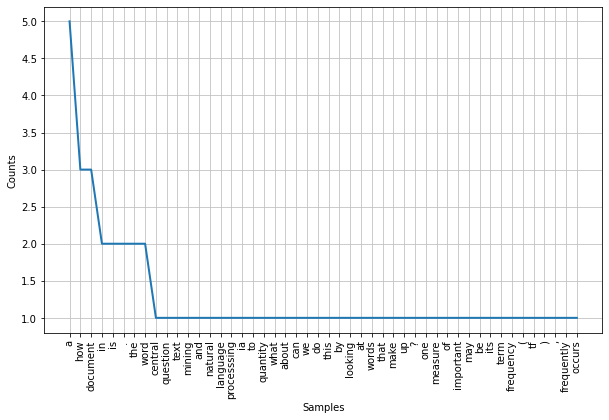

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [25]:
fdist.plot()

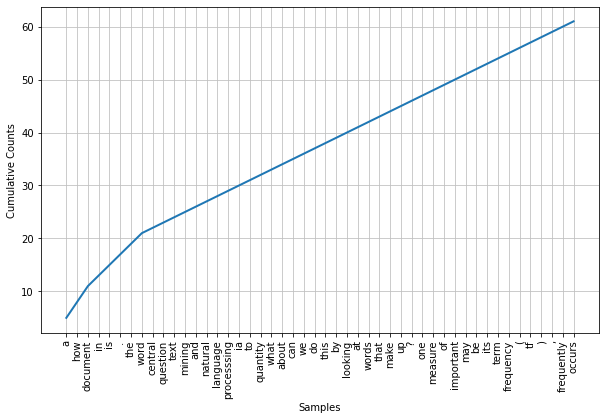

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [28]:
fdist.plot(50, cumulative=True)

In [29]:
import re

In [38]:
replacement_patterns = [(r'won\'t', 'will not'),(r'can\'t', 'can not')]

In [39]:
class RegexReplacer(object):
    def __init__(self, patterns=replacement_patterns):
        self.patterns = [(re.compile(regex), repl) for (regex, repl) in patterns]
    def replace(self, text):
        s= text
        for (pattern, repl) in self.patterns:
            (s, count)= re.subn(pattern, repl, s)
        return s

In [40]:
replacer = RegexReplacer()

In [41]:
replacer.replace("can't is a contraction")

'can not is a contraction'

Lexical Semantics

- Lexeme- refers to the pairing of a particular form (orthographic or phonological) with its meaning and lexicon is a finite list of lexemes
- a lexeme is the smallest or minimal unit of lexicon in a language that bears a particular 'meaning'
- lexeme is represented by a lemma or citation form
- a lemma or citation form is the grammateicl form that is used to represent a lexeme
   Carpet is the lemma for carpets
   Sing is the lemma for sing,sang and sung
 
- These specific forms of words are called wordforms

Lexical Semantics- stemming Words

- stemming is a technique to remove affixes from a word ending up with stem
  the stem or cooking is cook, and good stemming algorithm knows that the -ing suffix can be removed
- stemmming is most commonly used by search engines for indexing words
- Instead of storing all forms of a word ,a search engine can store only the stems, greatly reducing the size of index while increasing retrieval accuracy

- one of the most common stemming algorithms is the Porter stemming algorithm by marting porter
- It is designed to remove and replace well known suffixes of English words


In [42]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [43]:
stemmer.stem('cooking')

'cook'

In [45]:
stemmer.stem('designed')

'design'

In [46]:
stemmer.stem('generalizations')

'gener'

In [47]:
stemmer.stem('elephants')

'eleph'

Stemming Algorithms

- There are other stemming alogorithms out there besides the porter stemming algorithm, such as the Lancaster stemming algorithm, developed at lancaster university.
- all the stemmers covered next inherit from the stemmer1 interface, which defines the stem() method

Stemmer1 (stem())
1. PorterStemmer
2.RegexpStemmer
3. SnowballStemmer
4.LancasterStemmer

In [48]:
#lancaster stemmer

from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()
stemmer.stem('cooking')

'cook'

In [49]:
# RegexpStemmer

# you can also construct your own stemmer using the RegexpStemmer class. 
# It takes a single regular expression and removes any prefix or suffix that matches the expression

from nltk.stem import RegexpStemmer
stemmer = RegexpStemmer('ing')
stemmer.stem('cooking')

'cook'

In [51]:
stemmer.stem('cookery')

'cookery'

In [52]:
stemmer.stem('ingleside')

'leside'

Lemmatization

- the process of mapping from a wordform to a lemma is called lemmatization
- lemmatization is not always deterministic since itm ay depend on the context:
     * The wordform found can mao to the lemma find (meaning 'to locate') or the lemma found ('to create an institution')
       - he has looked at 14 baseball and football stadiums and "found" that only one - private Dodger Stadium - brought more            money into a city that it took out
       - Culturally speaking, this city has increasingly displayed its determination to found the sort of institutionsthat                attract the esteem of eastern urbanities
- lemma are part-of-speech specfic
  The wordform tables has 2 possible lemmas, the noun table and verb table
       

WordNet

- wordnet is a semantically oriented dictionary of English,similar to a traditional thesaurs but with a richer structure
- nouns, verbs, adjectives and adverbs are grouped into sets of cognitive synonyms (synsets) , each expressing a distinct concept.
- NLTK includes the English WordNet
- The main relation among words in wordnet is synonymy , as between the words "shut" and "close" or "car" and "automobile"
- Polysemy -- senses that related semantically

Lemmatizing Words with WordNet

use of WordNetLemmatizer class to find lemmas:

In [53]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize('cooking')


'cooking'

In [54]:
lemmatizer.lemmatize('cooking', pos='v')

'cook'

In [55]:
lemmatizer.lemmatize('cooking', pos='n')

'cooking'

In [56]:
lemmatizer.lemmatize('cookbooks')

'cookbook'

In [57]:
# porter stemmer
stemmer = PorterStemmer()
stemmer.stem('believes')


'believ'

In [59]:
lemmatizer.lemmatize('believes')

'belief'

// lematization form very accuratly given the output

Spell correction

- some use cases require you to use a basic specllcheck
- we can create a very basic spellchecker by just using a dictionary lookup
- one of the most commonly used is edit-distance

In [60]:
from nltk.metrics import edit_distance
edit_distance("PARK", "SPAKE")

3

In [ ]:
Word Sense

In [61]:
from nltk.corpus import wordnet as wn
wn.synsets('bank')

[Synset('bank.n.01'),
 Synset('depository_financial_institution.n.01'),
 Synset('bank.n.03'),
 Synset('bank.n.04'),
 Synset('bank.n.05'),
 Synset('bank.n.06'),
 Synset('bank.n.07'),
 Synset('savings_bank.n.02'),
 Synset('bank.n.09'),
 Synset('bank.n.10'),
 Synset('bank.v.01'),
 Synset('bank.v.02'),
 Synset('bank.v.03'),
 Synset('bank.v.04'),
 Synset('bank.v.05'),
 Synset('deposit.v.02'),
 Synset('bank.v.07'),
 Synset('trust.v.01')]

In [63]:
# number of different word senses

print(len(wn.synsets('bank')))

18


In [64]:
# definition of different word senses

print(wn.synset('bank.n.1').definition())

sloping land (especially the slope beside a body of water)


In [66]:
len(wn.synset('bank.n.01').examples())

2

In [67]:
print(wn.synset('bank.n.01').examples()[0])

they pulled the canoe up on the bank


POS

- There are 4 common part of speech tags found in wordnet.

noun - n
adjective - a
adverb- r
verb - v

In [68]:
wn.synsets('great')

[Synset('great.n.01'),
 Synset('great.s.01'),
 Synset('great.s.02'),
 Synset('great.s.03'),
 Synset('bang-up.s.01'),
 Synset('capital.s.03'),
 Synset('big.s.13')]

In [69]:
wn.synsets('bank')

[Synset('bank.n.01'),
 Synset('depository_financial_institution.n.01'),
 Synset('bank.n.03'),
 Synset('bank.n.04'),
 Synset('bank.n.05'),
 Synset('bank.n.06'),
 Synset('bank.n.07'),
 Synset('savings_bank.n.02'),
 Synset('bank.n.09'),
 Synset('bank.n.10'),
 Synset('bank.v.01'),
 Synset('bank.v.02'),
 Synset('bank.v.03'),
 Synset('bank.v.04'),
 Synset('bank.v.05'),
 Synset('deposit.v.02'),
 Synset('bank.v.07'),
 Synset('trust.v.01')]

In [70]:
wn.synsets('great')

[Synset('great.n.01'),
 Synset('great.s.01'),
 Synset('great.s.02'),
 Synset('great.s.03'),
 Synset('bang-up.s.01'),
 Synset('capital.s.03'),
 Synset('big.s.13')]

In [71]:
wn.synsets('great', pos= 'a')

[Synset('great.s.01'),
 Synset('great.s.02'),
 Synset('great.s.03'),
 Synset('bang-up.s.01'),
 Synset('capital.s.03'),
 Synset('big.s.13')]

Relations between senses

There are different relations among the word senses such as

- Synonymy 
  * when 2 senses of 2 different words(lemmas) are identical (car/automobile, vomit/throw up , couch/sofa

- Antonomy - words with opposite meaning
- Hypernymy- hierachical relationship
- Meronymy- part of relationship


In [72]:
# senses and synonyms

from nltk.corpus import wordnet as wn
wn.synsets('motorcar')

[Synset('car.n.01')]

In [73]:
print(wn.synset('car.n.01').lemma_names())

['car', 'auto', 'automobile', 'machine', 'motorcar']


In [74]:
# senses and antonyms

wn.synsets('good')

[Synset('good.n.01'),
 Synset('good.n.02'),
 Synset('good.n.03'),
 Synset('commodity.n.01'),
 Synset('good.a.01'),
 Synset('full.s.06'),
 Synset('good.a.03'),
 Synset('estimable.s.02'),
 Synset('beneficial.s.01'),
 Synset('good.s.06'),
 Synset('good.s.07'),
 Synset('adept.s.01'),
 Synset('good.s.09'),
 Synset('dear.s.02'),
 Synset('dependable.s.04'),
 Synset('good.s.12'),
 Synset('good.s.13'),
 Synset('effective.s.04'),
 Synset('good.s.15'),
 Synset('good.s.16'),
 Synset('good.s.17'),
 Synset('good.s.18'),
 Synset('good.s.19'),
 Synset('good.s.20'),
 Synset('good.s.21'),
 Synset('well.r.01'),
 Synset('thoroughly.r.02')]

In [75]:
gn2 = wn.synset('good.n.02')
gn2.definition()

'moral excellence or admirableness'

In [78]:
evil = gn2.lemmas()[0].antonyms()[0]
evil.name()

'evil'

In [79]:
evil.synset().definition()

'the quality of being morally wrong in principle or practice'

In [80]:
# sense with hyponomy

from nltk.corpus import wordnet as wn
wn.synsets('motorcar')

[Synset('car.n.01')]

In [81]:
print(wn.synset('car.n.01').lemma_names())

['car', 'auto', 'automobile', 'machine', 'motorcar']


In [82]:
wn.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [83]:
motorcar = wn.synset('car.n.01')
types_of_motorcar = motorcar.hyponyms()
types_of_motorcar

[Synset('ambulance.n.01'),
 Synset('beach_wagon.n.01'),
 Synset('bus.n.04'),
 Synset('cab.n.03'),
 Synset('compact.n.03'),
 Synset('convertible.n.01'),
 Synset('coupe.n.01'),
 Synset('cruiser.n.01'),
 Synset('electric.n.01'),
 Synset('gas_guzzler.n.01'),
 Synset('hardtop.n.01'),
 Synset('hatchback.n.01'),
 Synset('horseless_carriage.n.01'),
 Synset('hot_rod.n.01'),
 Synset('jeep.n.01'),
 Synset('limousine.n.01'),
 Synset('loaner.n.02'),
 Synset('minicar.n.01'),
 Synset('minivan.n.01'),
 Synset('model_t.n.01'),
 Synset('pace_car.n.01'),
 Synset('racer.n.02'),
 Synset('roadster.n.01'),
 Synset('sedan.n.01'),
 Synset('sport_utility.n.01'),
 Synset('sports_car.n.01'),
 Synset('stanley_steamer.n.01'),
 Synset('stock_car.n.01'),
 Synset('subcompact.n.01'),
 Synset('touring_car.n.01'),
 Synset('used-car.n.01')]

In [84]:
motorcar = wn.synset('car.n.01')
motorcar.hypernyms()

[Synset('motor_vehicle.n.01')]

In [86]:
wn.synset('motor_vehicle.n.01')

Synset('motor_vehicle.n.01')

In [89]:
wn.synset('motor_vehicle.n.01').hypernyms()

[Synset('self-propelled_vehicle.n.01')]

In [90]:
wn.synset('self-propelled_vehicle.n.01').hypernyms()

[Synset('wheeled_vehicle.n.01')]

In [93]:
# Meronymy 

#part whole relations

wn.synset('tree.n.01').part_meronyms()

[Synset('burl.n.02'),
 Synset('crown.n.07'),
 Synset('limb.n.02'),
 Synset('stump.n.01'),
 Synset('trunk.n.01')]

In [95]:
wn.synset('tree.n.01').substance_meronyms()

[Synset('heartwood.n.01'), Synset('sapwood.n.01')]

In [98]:
import spacy

In [99]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(u'Apple is looking at buying U.K. startup for $1 billion')